# Index

1. Import Libraries
2. Read The Data
   - Read the data
   - Shuffle the data
   - Filter the data if required
3. Data Cleaning
   - To Remove Null
   - To Remove Duplicate
4. EDA
   -  4.1 Checking for data imbalance
   -  4.2 Counting the Sentence, words and character in each email
   -  4.3 Statistical parameters of each class
   -  4.4 correlation between No of sentence, words and character 
5. Pre-Process the data
   - 5.1 : Text data precessing
        - Reoving Special Character
        - Lower case
        - Tokenization
        - Removing Stop words and Punctuation
        - Stemming
   - 5.2 Most frquent words in each class
   - 5.3 TFIDF to convert words to vector
6. Model Buiding
   - 6.1 Different ML Model Training
   - 6.2 Xgboost model
   - 6.3 Adding no of char column
   - 6.4 PCA

## 1.Import Libraries

In [ ]:
import os
import string
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
import numpy as np
from tqdm import tqdm
import matplotlib as plt
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Read The Data
- Read the data
- Shuffle the data
- Filter the data if required

In [ ]:
os.listdir("enron_with_categories")
data = []
for i in range(1,7):
    ham_files_location = os.listdir("enron_with_categories/"+str(i))
    print(i)
    print(len(ham_files_location))
    for file_path in tqdm(ham_files_location):
        if file_path[-4:]!='cats':
            f = open("enron_with_categories/"+ str(i) +"/"+ file_path, "r")
            text = str(f.read())
            
            data.append([text, i])
                
# convert to numpy array
data = np.array(data)
print(data.shape)

In [ ]:
data[1]

In [ ]:
# Shuffle the data
np.random.shuffle(data)

In [ ]:
# filter the data if required 
df = pd.DataFrame(data[0:1663],columns= ['message','label'])

## 3. Data Cleaning
- To Remove Null 
- To Remove Duplicate

In [ ]:
df.info()

In [ ]:
df.sample(5)

In [ ]:
# missing values
df.isnull().sum()

In [ ]:
# checking for duplicated records
df.duplicated().sum()

## 4. EDA
-  4.1 Checking for data imbalance
-  4.2 Counting the Sentence, words and character in each email
-  4.3 Statistical parameters of each class
-  4.4 correlation between No of sentence, words and character 

In [ ]:
df.head()

### 4.1 Checking for data imbalance

In [ ]:
pd.DataFrame(df['label'].value_counts())

- <b>Data is imbalance</b>

In [ ]:
plt.pie(df['label'].value_counts(), labels=['1', '4', '6', '3', '5', '2'],autopct="%0.1f")
plt.show()

### 4.2 Counting the Sentence, words and character in each email

In [ ]:
df['No_Of_Sent'] = df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))
df['No_Of_Words'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
df['No_Of_Char'] = df['message'].apply(len)

In [ ]:
df[['No_Of_Sent','No_Of_Words','No_Of_Char']].describe()

### 4.3 Statistical parameters of each class

In [ ]:
df[df['label'] == '1'][['No_Of_Sent','No_Of_Words','No_Of_Char']].describe()

In [ ]:
df[df['label'] == '2'][['No_Of_Sent','No_Of_Words','No_Of_Char']].describe()

In [ ]:
df[df['label'] == '3'][['No_Of_Sent','No_Of_Words','No_Of_Char']].describe()

- Here, Mean of the different different clas is different.

In [ ]:
plt.figure(figsize=(22,6))
sns.histplot(df[df['label'] == '1']['No_Of_Sent'])
sns.histplot(df[df['label'] == '2']['No_Of_Sent'],color='red')
sns.histplot(df[df['label'] == '3']['No_Of_Sent'],color='green')
sns.histplot(df[df['label'] == '4']['No_Of_Sent'],color='yellow')
sns.histplot(df[df['label'] == '5']['No_Of_Sent'],color='pink')
sns.histplot(df[df['label'] == '6']['No_Of_Sent'],color='black')

### 4.4 Correlation between No of sentence, words and character 

In [ ]:
sns.pairplot(df,hue='label')

In [ ]:
sns.heatmap(df.corr(),annot=True)

- All 3 Added columns('No_Of_Sent','No_Of_Words','No_Of_Char') are highly correlated.

## 5.Data transformation
5.1 Text data precessing
- Reoving Special Character
- Lower case
- Tokenization
- Removing Stop words and Punctuation
- Stemming

5.2 Most frquent words in each class

5.3 TFIDF to convert words to vector

### 5.1 Text data precessing

In [ ]:
# Porter steemer is used for steming the words
ps = PorterStemmer()
corpus = []
for i in tqdm(range(0, len(df))):
    review = re.sub('[^a-zA-Z]', ' ', df['message'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
len(corpus)

In [23]:
df['Revised_message'] = corpus

###  5.2 Most frquent words in each class

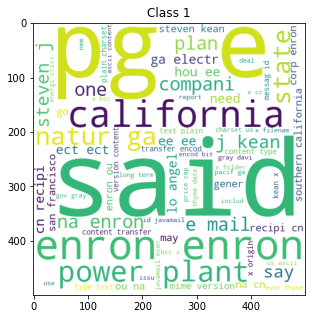

In [24]:
# For class 1:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=12,background_color='white')
class_wc_1 = wc.generate(df[df['label'] == '1']['Revised_message'].str.cat(sep=" "))
plt.figure(figsize=(10,5))
plt.title('Class 1')
plt.imshow(class_wc_1)

- for Class 1, said, enron, calofornia, pge, etc. are most frequent words

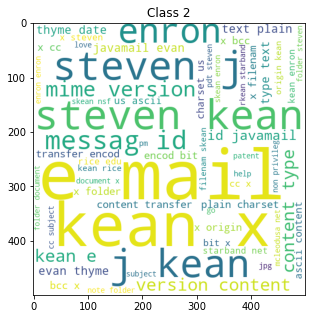

In [25]:
# For class 2:
class_wc_2 = wc.generate(df[df['label'] == '2']['Revised_message'].str.cat(sep=" "))
plt.figure(figsize=(10,5))
plt.title('Class 2')
plt.imshow(class_wc_2)

- for Class 2, e mail, kean, steven, enron, etc. are most frequent words

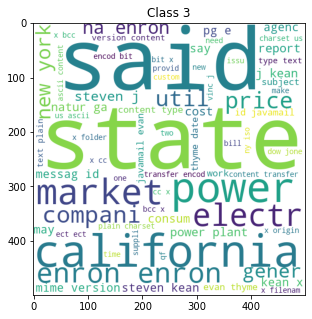

In [26]:
# For class 3:
class_wc_3 = wc.generate(df[df['label'] == '3']['Revised_message'].str.cat(sep=" "))
plt.figure(figsize=(10,5))
plt.title('Class 3')
plt.imshow(class_wc_3)

- for Class 1, said, state, calofornia, market, etc. are most frequent words

### 5.3 TFIDF to convert words to vector

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(corpus)
print(X.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [28]:
X.shape

(1663, 3000)

In [29]:
# Label defining
y=df['label']

In [30]:
y.shape

(1663,)

## 6. Modelling Training
- 6.1 Different ML Model Training
- 6.2 Xgboost model
- 6.3 Adding no of char column
- 6.4 PCA

###  6.1 Different ML Model Training

In [31]:
# Splitting the data in 80:20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [32]:
# few popular Ml Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [33]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [34]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb,  
    'LR': lrc,
    'DT': dtc,
    'RF': rfc, 
    'GBDT':gbdt,
    'xgb':xgb,
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
}


In [35]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred,average='weighted')
    
    return accuracy,precision

In [36]:
accuracy_scores = []
precision_scores = []

# to iterate over all algorithms, train and predict accuracy and precision score
for name,clf in clfs.items():  
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  SVC
Accuracy -  0.6996996996996997
Precision -  0.6766742470625965
For  KN
Accuracy -  0.6396396396396397
Precision -  0.6072535251497272
For  NB
Accuracy -  0.6516516516516516
Precision -  0.5173563807710149
For  LR
Accuracy -  0.6756756756756757
Precision -  0.6573781249389484
For  DT
Accuracy -  0.6276276276276276
Precision -  0.5448284252632078


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  RF
Accuracy -  0.6636636636636637
Precision -  0.6369956913435174
For  GBDT
Accuracy -  0.6966966966966966
Precision -  0.6722619748935539
For  xgb
Accuracy -  0.7087087087087087
Precision -  0.6942801698655496


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  AdaBoost
Accuracy -  0.5675675675675675
Precision -  0.5271499577601939
For  BgC
Accuracy -  0.6906906906906907
Precision -  0.6833108595422456
For  ETC
Accuracy -  0.6726726726726727
Precision -  0.6540074557315937


In [37]:
performance_df = pd.DataFrame({'Algorithm':list(clfs.keys()),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [38]:
performance_df

,Algorithm,Accuracy,Precision
7,xgb,0.708709,0.694280
9,BgC,0.690691,0.683311
0,SVC,0.699700,0.676674
6,GBDT,0.696697,0.672262
3,LR,0.675676,0.657378
10,ETC,0.672673,0.654007
5,RF,0.663664,0.636996
1,KN,0.639640,0.607254
4,DT,0.627628,0.544828
8,AdaBoost,0.567568,0.527150


- Xgboost is performs the best out of all the trained model, so, let's take Xgboost to proceed further.

### 6.2 Xgboost model

In [39]:
xgb = XGBClassifier(n_estimators=50,random_state=2)
# fitting x samples and y classes 
xgb.fit(X_train, y_train)


y_pred=xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred,average='weighted')
print("Accuracy:",accuracy)
print("Precision:",precision)

Accuracy: 0.7087087087087087
Precision: 0.6942801698655496


In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[145,   1,   1,  13,   0,   4],
       [  2,   0,   1,   3,   0,   0],
       [ 13,   0,   4,   3,   1,   0],
       [ 25,   0,   0,  72,   1,   3],
       [  6,   0,   0,   4,   5,   0],
       [ 15,   0,   0,   1,   0,  10]], dtype=int64)

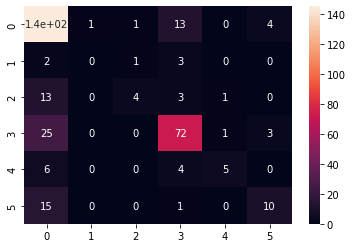

In [41]:
sns.heatmap(cm,annot=True,)

### 6.3 Adding no of char column

In [42]:
# The column to be added
col = np.array(df[['No_Of_Char']])
# Adding column to array using append() method
arr = np.concatenate([X.toarray(), col], axis=1)
# Array after adding the column.
print(arr)

[[   0.    0.    0. ...    0.    0.  742.]
 [   0.    0.    0. ...    0.    0. 2462.]
 [   0.    0.    0. ...    0.    0.  559.]
 ...
 [   0.    0.    0. ...    0.    0. 1772.]
 [   0.    0.    0. ...    0.    0. 3454.]
 [   0.    0.    0. ...    0.    0.  460.]]


In [43]:
# Normalizing column using Minmax scalar
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(arr)

In [44]:
X.shape

(1663, 3001)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

xgb = XGBClassifier(n_estimators=50,random_state=2)
# fitting x samples and y classes 
xgb.fit(X_train, y_train)


y_pred=xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred,average='weighted')
print("Accuracy:",accuracy)
print("Precision:",precision)

Accuracy: 0.7117117117117117
Precision: 0.6911535321729496


In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[147,   1,   1,  10,   0,   5],
       [  2,   0,   1,   3,   0,   0],
       [ 11,   0,   5,   4,   1,   0],
       [ 25,   0,   1,  72,   1,   2],
       [  5,   0,   0,   4,   6,   0],
       [ 16,   0,   0,   3,   0,   7]], dtype=int64)

<b>Conclusion:</b> No effect of adding No of char column/feature

### 6.4 PCA
- To reduce the no of features we uses PCA

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(corpus)
print(X.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [72]:
X.shape

(1663, 3000)

In [75]:
from sklearn.decomposition import PCA

principal=PCA(n_components=100)
principal.fit(X.toarray())
X_PCA=principal.transform(X.toarray())
 

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_PCA, y, test_size = 0.20, random_state = 0)

xgb = XGBClassifier(n_estimators=50,random_state=2)
# fitting x samples and y classes 
xgb.fit(X_train, y_train)


y_pred=xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred,average='weighted')
print("Accuracy:",accuracy)
print("Precision:",precision)

Accuracy: 0.7087087087087087
Precision: 0.6848666848666849


- BY using PCA, Result is alost same but computational time and features are reduced.

# END